In [200]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

## **Exploring Data**

In [201]:
data = pd.read_csv("Otherdata/bank-full.csv",sep=";")

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [203]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

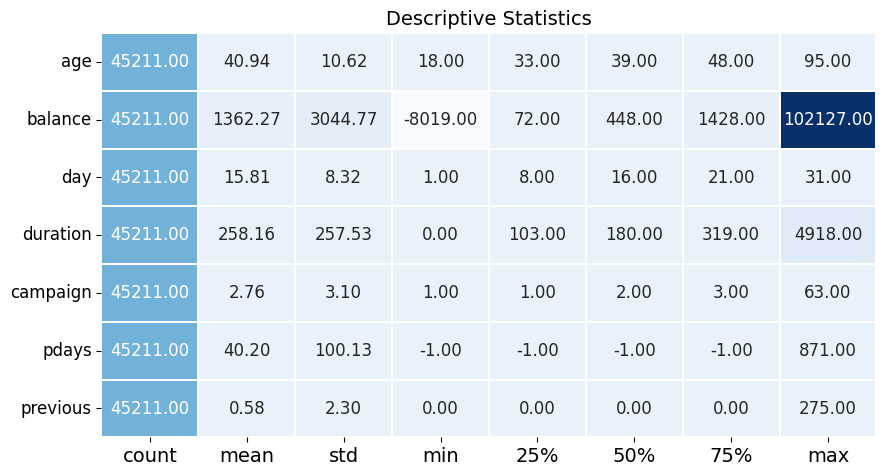

In [204]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [205]:
print("Total nulls:")
data.isnull().sum()

Total nulls:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [206]:
# Calculate the count of 'unknown' and 'other' in the 'poutcome' column
unknown_count = (data['poutcome'] == 'unknown').sum()
other_count = (data['poutcome'] == 'other').sum()

# Calculate the total count of values in the 'poutcome' column
total_count = len(data)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown = (unknown_count / total_count) * 100
percentage_other = (other_count / total_count) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown)
print("Percentage of 'other' in poutcome:", percentage_other)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [207]:
# Drop the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [208]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")


Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: contact, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [209]:
data = data.drop(4)

## **Data Plots**

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

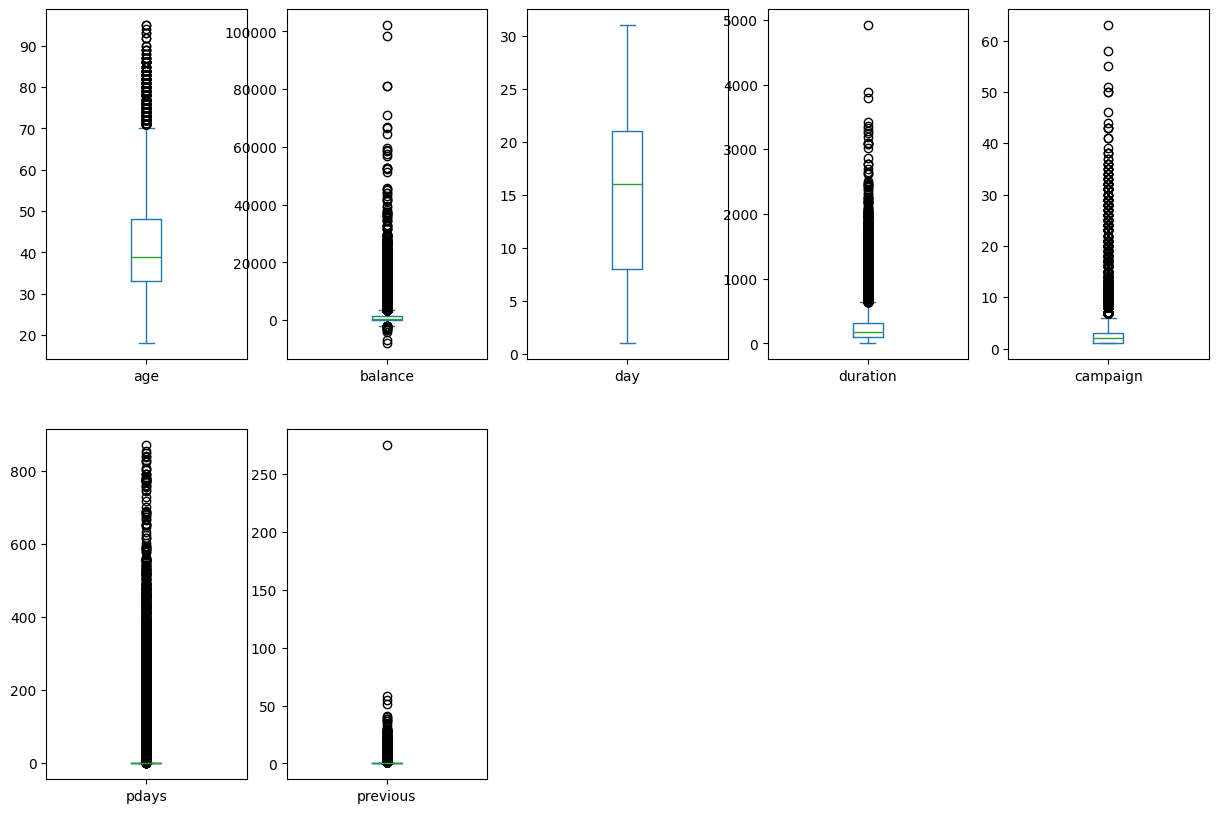

In [210]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))

In [212]:
data = remove_outliers(data, 'age')
data = remove_outliers(data, 'balance')
data = remove_outliers(data, 'duration')
data = remove_outliers(data, 'campaign')
data = remove_outliers(data, 'previous')

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

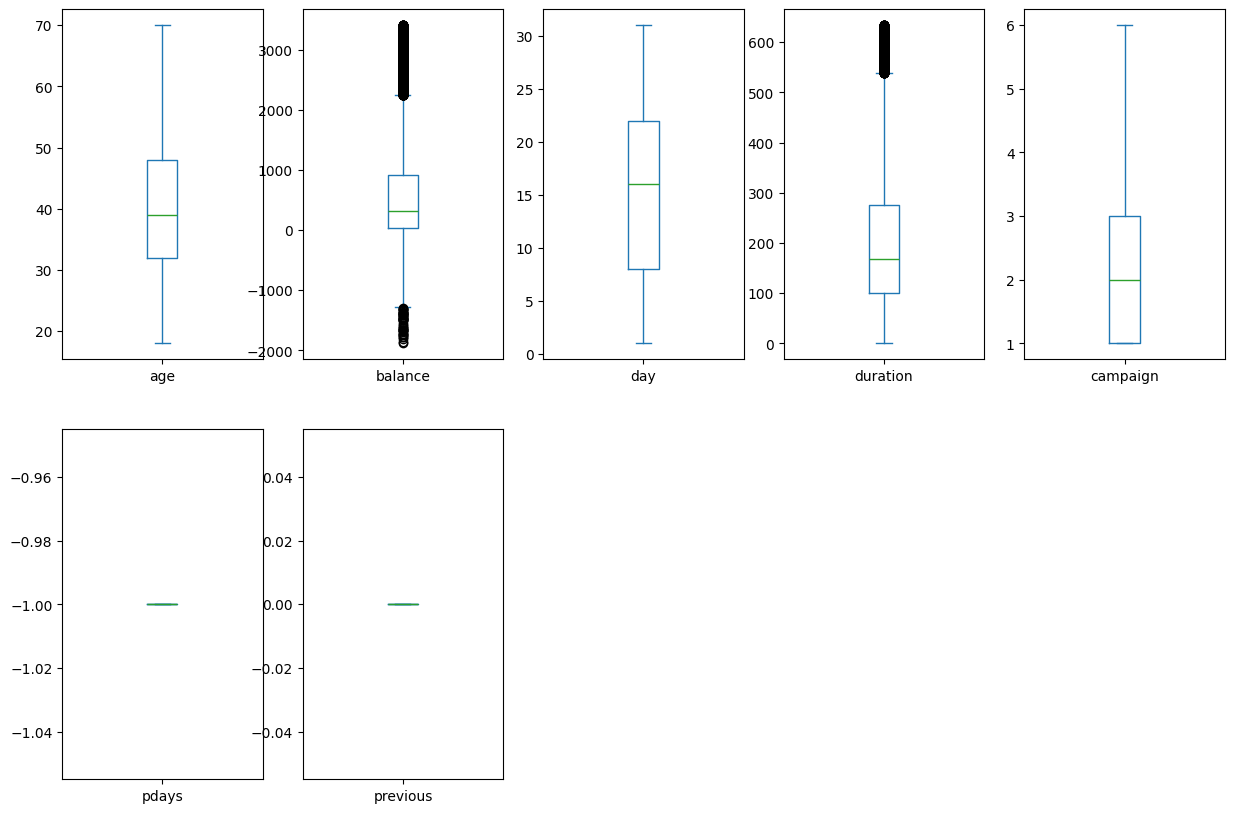

In [213]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))

In [214]:
data.shape

(28068, 16)

# **EDA for Bank Full**

In [215]:
job_counts = data['job'].value_counts()
job_percentages = job_counts / len(data) * 100

job_data = pd.DataFrame({'Job': job_counts.index, 'Count': job_counts.values, 'Percentage': job_percentages.values})
job_data

,Job,Count,Percentage
0,blue-collar,6336,22.573749
1,management,5574,19.858914
2,technician,4780,17.030070
3,admin.,3252,11.586148
4,services,2737,9.751318
5,retired,1136,4.047314
6,entrepreneur,962,3.427391
7,self-employed,952,3.391763
8,unemployed,818,2.914351
9,housemaid,817,2.910788


In [216]:
grouped = data.groupby(['job', 'y']).size().unstack()
grouped['counts'] = grouped['yes'] + grouped['no']
grouped['percentages'] = grouped['yes'] / grouped['counts'] * 100
grouped = grouped[['yes', 'no', 'counts', 'percentages']]
print(grouped)

y              yes    no  counts  percentages
job                                          
admin.         201  3051    3252     6.180812
blue-collar    187  6149    6336     2.951389
entrepreneur    39   923     962     4.054054
housemaid       36   781     817     4.406365
management     388  5186    5574     6.960890
retired        109  1027    1136     9.595070
self-employed   53   899     952     5.567227
services       106  2631    2737     3.872853
student        110   421     531    20.715631
technician     262  4518    4780     5.481172
unemployed      66   752     818     8.068460
unknown          8   165     173     4.624277


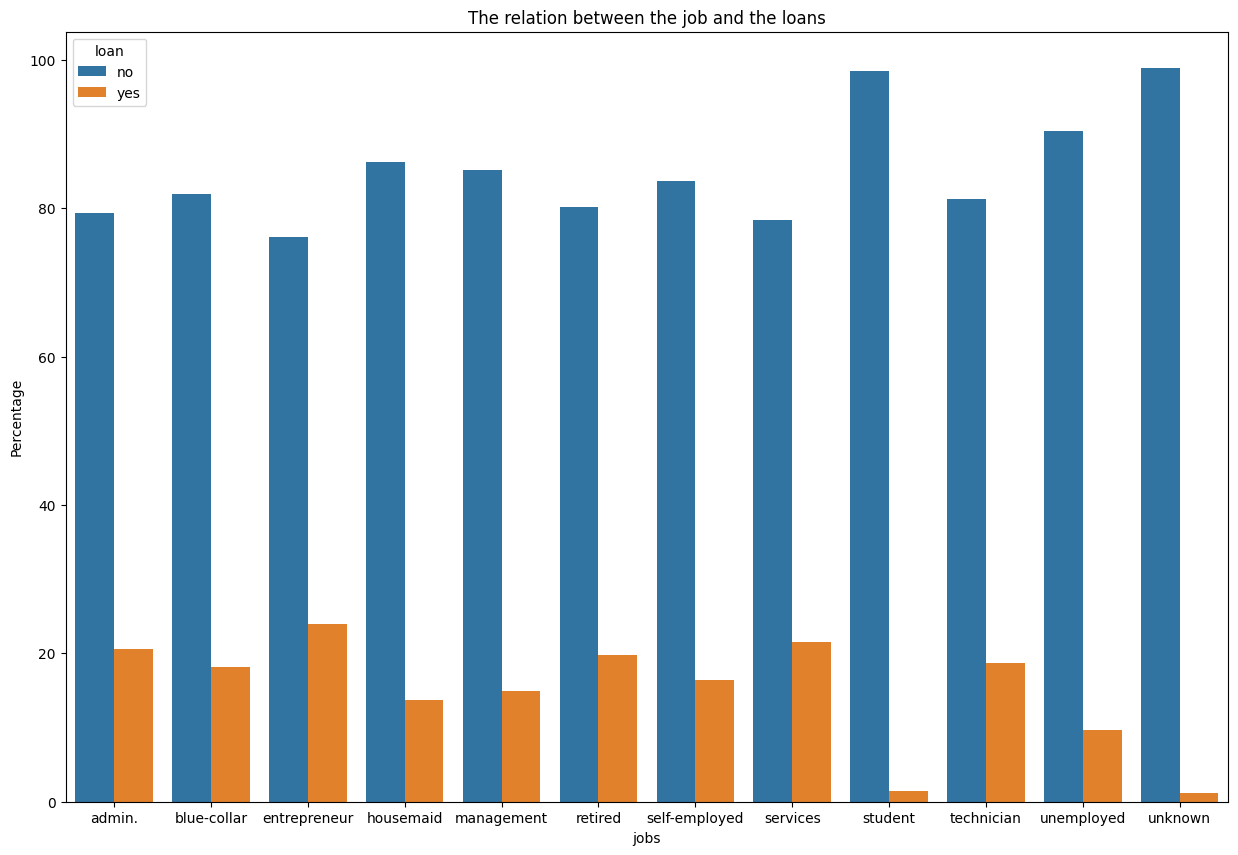

In [217]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

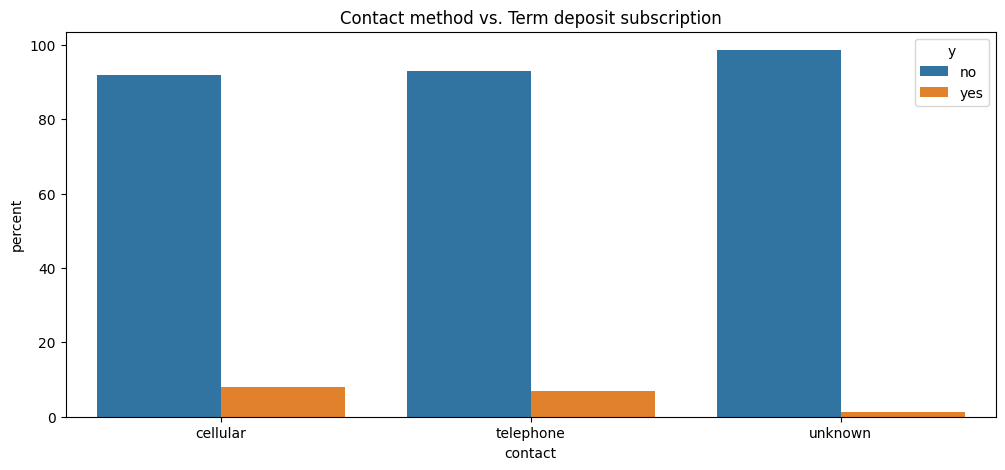

In [218]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
plt.title("Contact method vs. Term deposit subscription")
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.show()

C:\Users\rbrul\AppData\Local\Temp\ipykernel_29092\1645057988.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



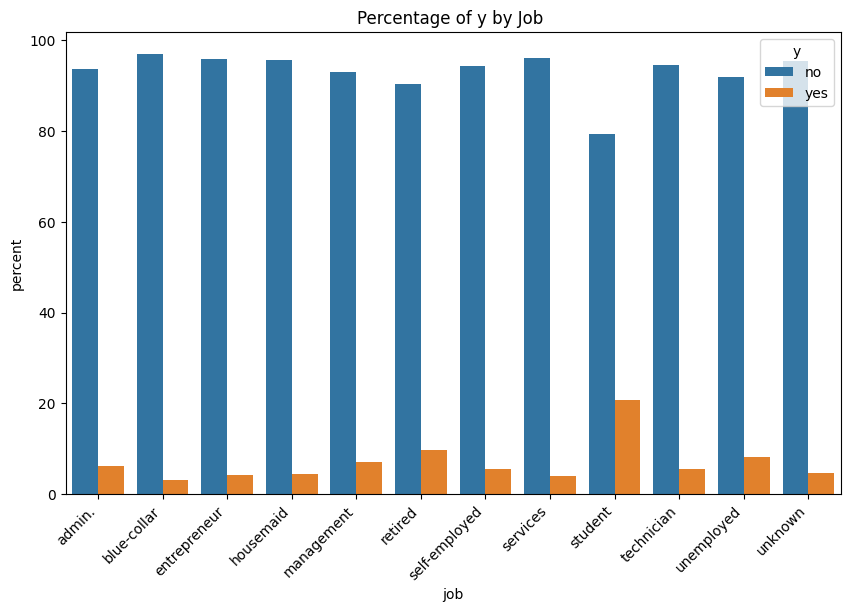

In [219]:
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

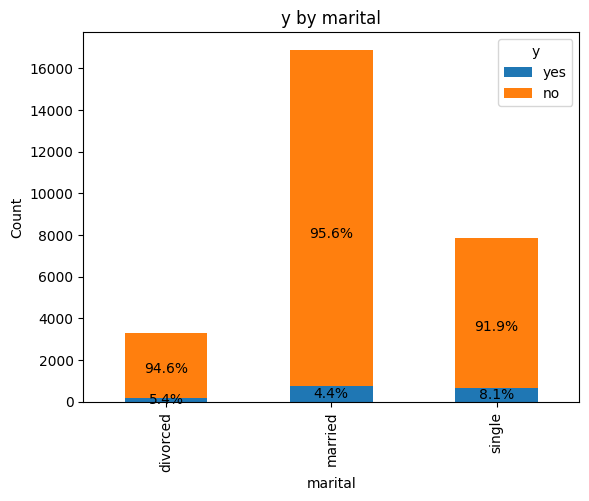

In [220]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

In [221]:
fig = px.histogram(data, x='duration', color='y')
fig.update_layout(title='Duration Vs. Y')
fig.show()

In [222]:
fig = px.histogram(data,x='balance',color='y')
fig.update_layout(title='Balance Vs. Y')
fig.show()

In [223]:
fig = px.histogram(data,x='age',color='y')
fig.update_layout(title='Age Vs. Y')
fig.show()

In [224]:

grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')


percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)


grouped_df['percentages'] = percentages


fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))
fig.update_layout(title='Housing Loans')

fig.show()


In [225]:
fig = px.histogram(data, x="y",color = 'education')
fig.update_layout(title='Education Vs. Y')
fig.show()

Text(0.5, 1.0, "Distribution of 'default' by 'y'")

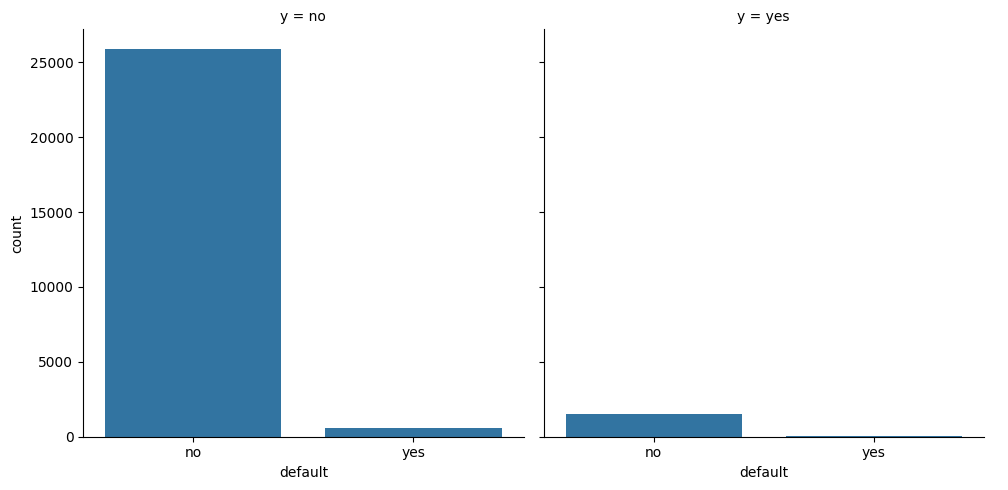

In [226]:
sns.catplot(data=data , x="default" , col="y",kind='count')
ax.set_title("Distribution of 'default' by 'y'")

# **Preprocessing Bank-Full-Additional**

In [227]:
data = pd.read_csv("Otherdata/bank-additional-full.csv",sep=";")

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [229]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

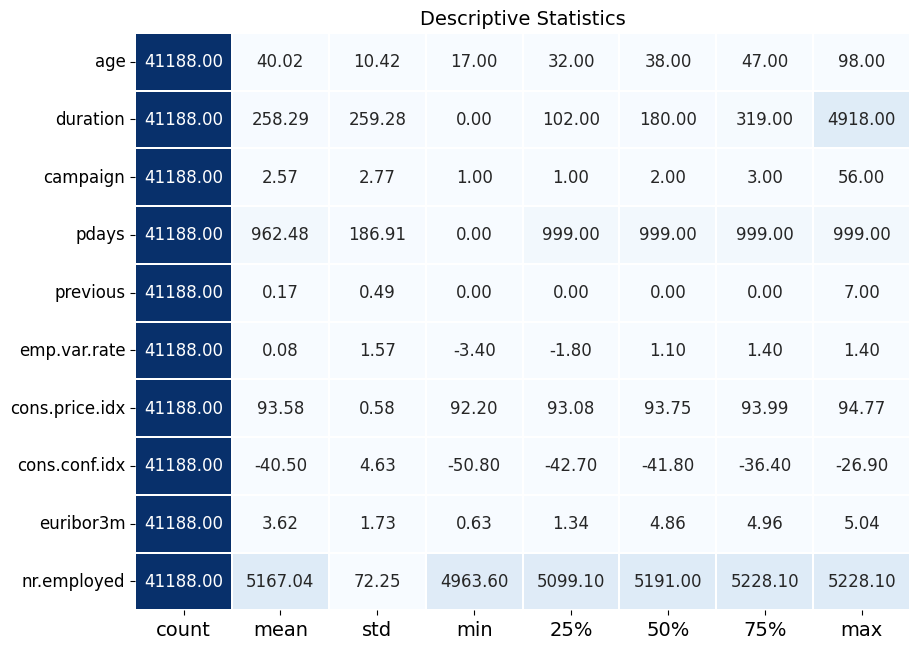

In [230]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [231]:
print("Total nulls:")
data.isnull().sum()

Total nulls:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [232]:
# Drop the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [233]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0        0.0
1        5.0
2        0.0
3        0.0
4        0.0
        ... 
41183    0.0
41184    0.0
41185    0.0
41186    0.0
41187    0.0
Length: 41188, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: default, Percentage: 20.87%

Row with the highest percentage of 'unknown' values:
Row: 2723, Pe

In [234]:
data = data.drop(2723)

# **Outlier Removal**

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

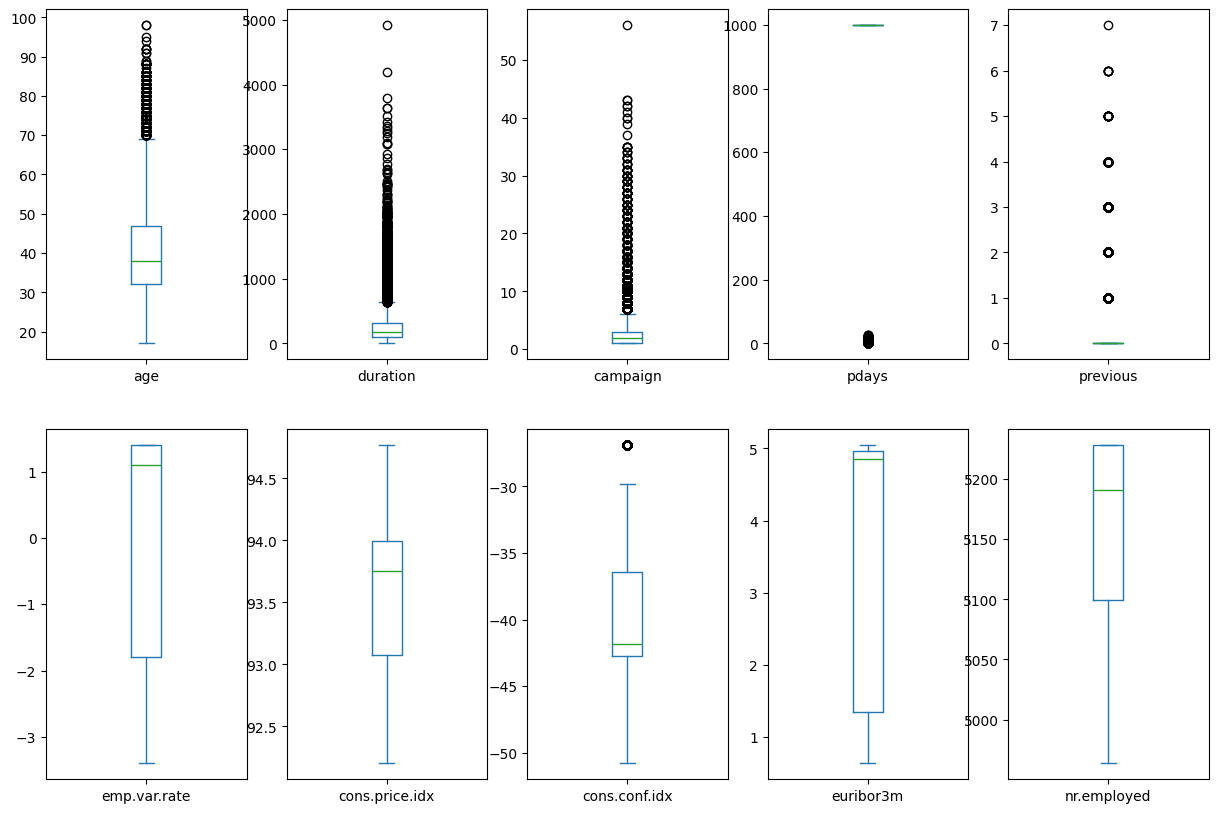

In [235]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))


In [236]:
data = remove_outliers(data, 'age')
data = remove_outliers(data, 'duration')
data = remove_outliers(data, 'campaign')
data = remove_outliers(data, 'previous')

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

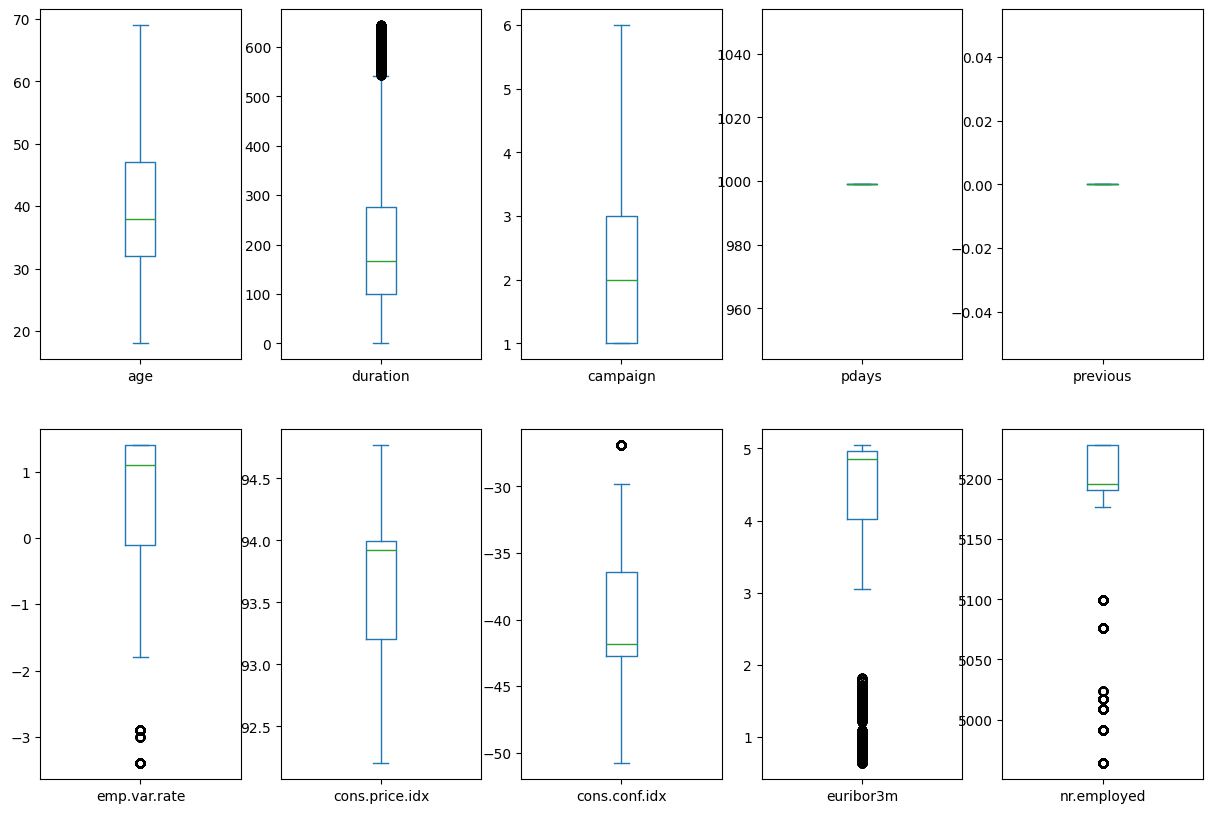

In [237]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))

In [238]:
data.shape

(30572, 20)

# **EDA Bank-Additional**

In [239]:
job_counts = data['job'].value_counts()
job_percentages = job_counts / len(data) * 100

job_data = pd.DataFrame({'Job': job_counts.index, 'Count': job_counts.values, 'Percentage': job_percentages.values})
job_data

,Job,Count,Percentage
0,admin.,7729,25.281303
1,blue-collar,7161,23.423394
2,technician,5125,16.763705
3,services,2975,9.731127
4,management,2159,7.062018
5,entrepreneur,1102,3.604606
6,self-employed,1066,3.486851
7,retired,936,3.061625
8,housemaid,806,2.636399
9,unemployed,741,2.423786


In [240]:
grouped = data.groupby(['job', 'y']).size().unstack()
grouped['counts'] = grouped['yes'] + grouped['no']
grouped['percentages'] = grouped['yes'] / grouped['counts'] * 100
grouped = grouped[['yes', 'no', 'counts', 'percentages']]
print(grouped)

y              yes    no  counts  percentages
job                                          
admin.         580  7149    7729     7.504205
blue-collar    207  6954    7161     2.890658
entrepreneur    53  1049    1102     4.809437
housemaid       37   769     806     4.590571
management     115  2044    2159     5.326540
retired        102   834     936    10.897436
self-employed   64  1002    1066     6.003752
services       111  2864    2975     3.731092
student        119   403     522    22.796935
technician     266  4859    5125     5.190244
unemployed      60   681     741     8.097166
unknown         11   239     250     4.400000


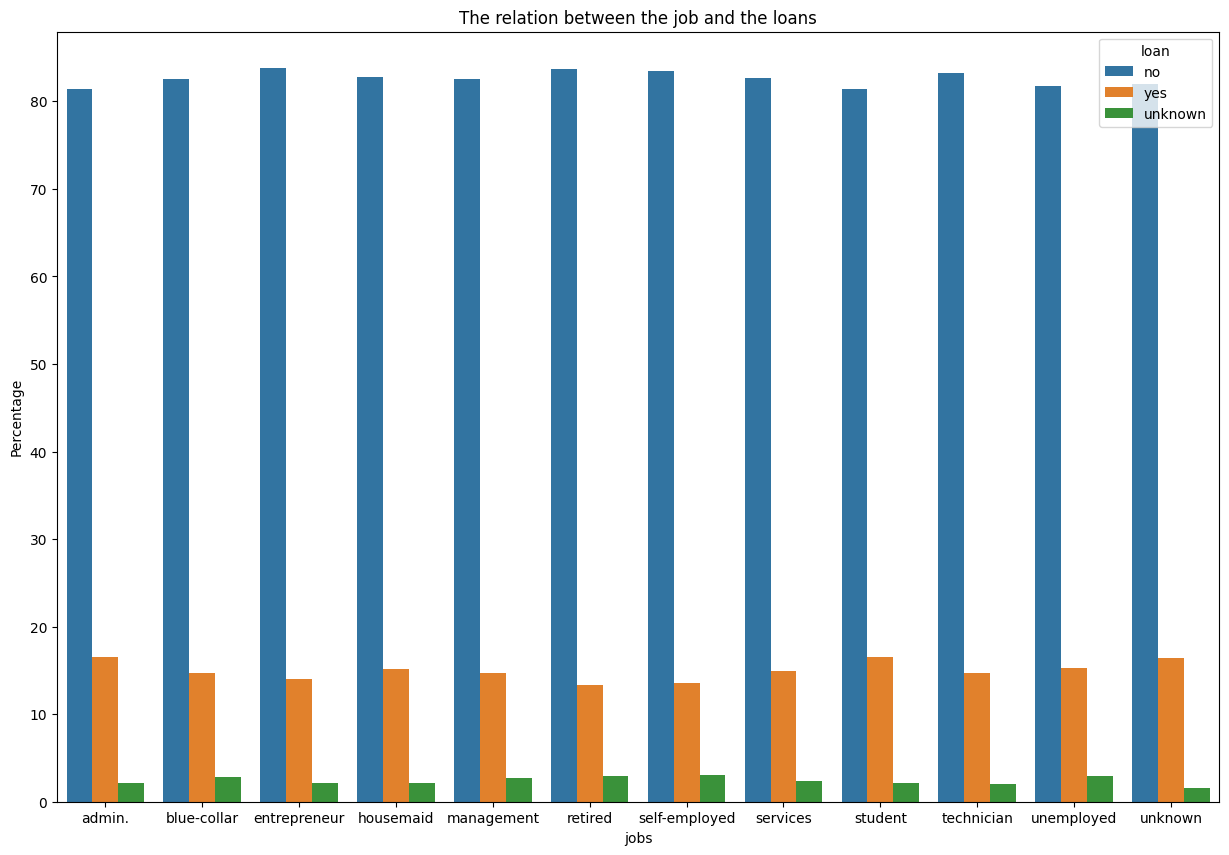

In [241]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

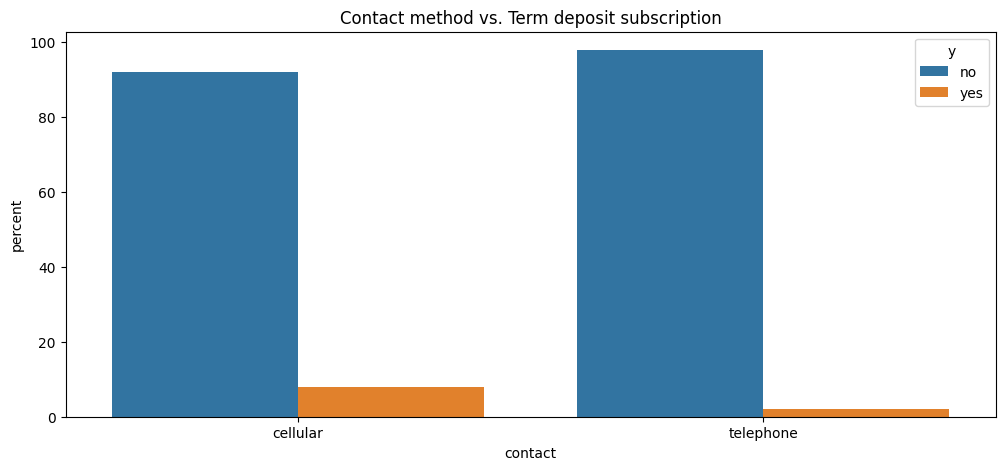

In [242]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
plt.title("Contact method vs. Term deposit subscription")
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.show()

C:\Users\rbrul\AppData\Local\Temp\ipykernel_29092\1645057988.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



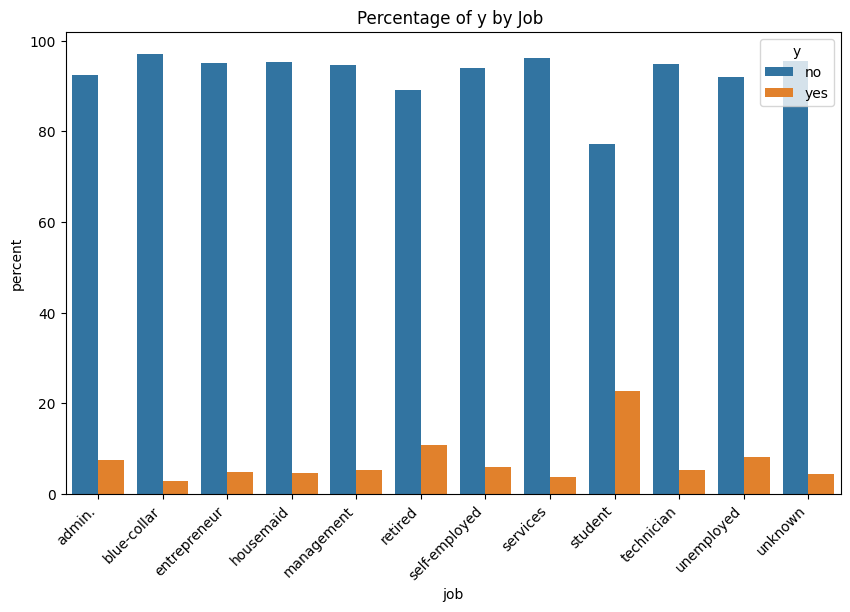

In [243]:
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

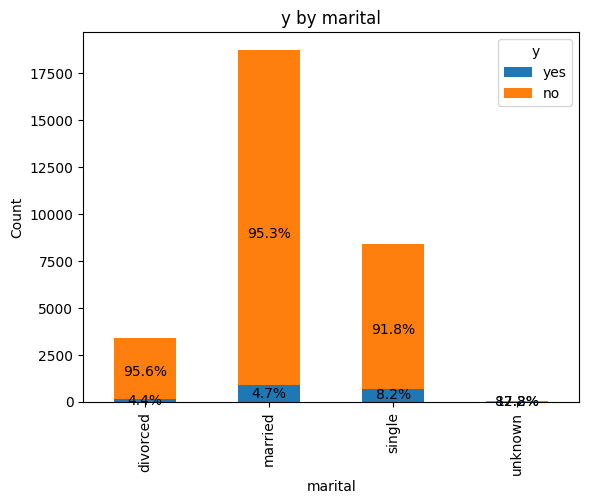

In [244]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

In [245]:
fig = px.histogram(data, x='duration', color='y')
fig.update_layout(title='Duration Vs. Y')
fig.show()

In [246]:
fig = px.histogram(data,x='age',color='y')
fig.update_layout(title='Age Vs. Y')
fig.show()

In [247]:

grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')


percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)


grouped_df['percentages'] = percentages


fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))
fig.update_layout(title='Housing Loans')

fig.show()

In [248]:
fig = px.histogram(data, x="y",color = 'education')
fig.update_layout(title='Education Vs. Y')
fig.show()

Text(0.5, 1.0, "Distribution of 'default' by 'y'")

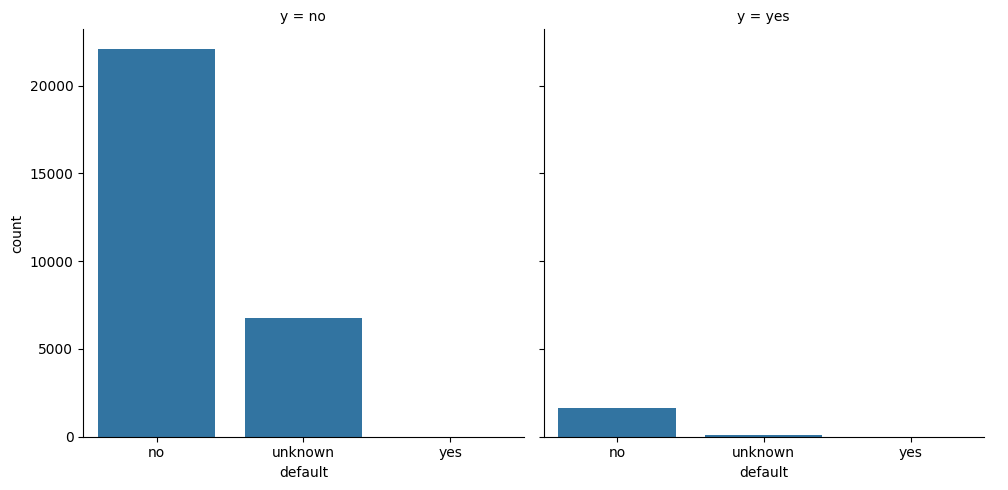

In [249]:
sns.catplot(data=data , x="default" , col="y",kind='count')
ax.set_title("Distribution of 'default' by 'y'")